<a href="https://colab.research.google.com/github/sriitzzz/sriitzzz/blob/main/Spotify_Analysis_Track_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install spotipy 

     |████████████████████████████████| 63 kB 1.4 MB/s 
     |████████████████████████████████| 138 kB 10.5 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [2]:
import requests

CLIENT_ID = 'b8f347f687ec4b3386c50c46ac1a4f78'
CLIENT_SECRET = '83ffad38578d4f77b3ecbe1c3bb64e50'

AUTH_URL = 'https://accounts.spotify.com/api/token'

In [3]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [4]:
artist_name = []
track_name = []
track_popularity = []
artist_id = []
track_id = []
for i in range(0,1000,50):
    track_results = sp.search(q='year:2021', type='track', limit=50,offset=i)
    for i, t in enumerate(track_results['tracks']['items']):
        artist_name.append(t['artists'][0]['name'])
        artist_id.append(t['artists'][0]['id'])
        track_name.append(t['name'])
        track_id.append(t['id'])
        track_popularity.append(t['popularity'])
        

In [5]:
import pandas as pd
track_df = pd.DataFrame({'artist_name' : artist_name, 'track_name' : track_name, 'track_id' : track_id, 'track_popularity' : track_popularity, 'artist_id' : artist_id})
print(track_df.shape)
track_df.head()

(1000, 5)


,artist_name,track_name,track_id,track_popularity,artist_id
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,1McMsnEElThX1knmY4oliG
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,32,6dPOSlnP4zgYg7bkAkp4dY
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,85,4gzpq5DPGxSnKTe4SA8HAU
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,4qmHkMxr6pTWh5Zo74odpH
4,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,90,5cj0lLjcoR7YOSnhnX0Po5


In [7]:
artist_popularity = []
artist_genres = []
artist_followers = []
for a_id in track_df.artist_id:
  artist = sp.artist(a_id)
  artist_popularity.append(artist['popularity'])
  artist_genres.append(artist['genres'])
  artist_followers.append(artist['followers']['total'])

In [8]:
track_df = track_df.assign(artist_popularity=artist_popularity, artist_genres=artist_genres, artist_followers=artist_followers)
track_df.head()

,artist_name,track_name,track_id,track_popularity,artist_id,artist_popularity,artist_genres,artist_followers
0,Olivia Rodrigo,good 4 u,4ZtFanR9U6ndgddUvNcjcG,90,1McMsnEElThX1knmY4oliG,89,[pop],16511111
1,LYMEY,END OF YEAR 2021,6usFCFN0F69JcAaHtB55sg,32,6dPOSlnP4zgYg7bkAkp4dY,22,[],495
2,Coldplay,My Universe,3FeVmId7tL5YN8B7R3imoM,85,4gzpq5DPGxSnKTe4SA8HAU,90,"[permanent wave, pop]",35635053
3,Elvis Costello & The Attractions,Pump It Up - 2021 Remaster,3oyc1mIdCBGaU55wX7otqM,60,4qmHkMxr6pTWh5Zo74odpH,56,"[art rock, folk rock, mellow gold, new wave po...",228012
4,Doja Cat,Woman,6Uj1ctrBOjOas8xZXGqKk4,90,5cj0lLjcoR7YOSnhnX0Po5,91,"[dance pop, pop]",18440383


In [9]:
track_features = []
for t_id in track_df['track_id']:
  af = sp.audio_features(t_id)
  track_features.append(af)

In [10]:
print(track_features[0][0].keys())

dict_keys(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])


In [11]:
tf_df = pd.DataFrame(columns = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature'])

In [12]:
for item in track_features:
  for feat in item:
    tf_df = tf_df.append(feat, ignore_index=True)

In [13]:
tf_df.head()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,0.563,0.664,9,-5.044,1,0.1540,0.33500,0,0.0849,0.688,166.928,audio_features,4ZtFanR9U6ndgddUvNcjcG,spotify:track:4ZtFanR9U6ndgddUvNcjcG,https://api.spotify.com/v1/tracks/4ZtFanR9U6nd...,https://api.spotify.com/v1/audio-analysis/4ZtF...,178147,4
1,0.429,0.829,6,-5.071,0,0.0604,0.02380,0.000174,0.6730,0.278,127.083,audio_features,6usFCFN0F69JcAaHtB55sg,spotify:track:6usFCFN0F69JcAaHtB55sg,https://api.spotify.com/v1/tracks/6usFCFN0F69J...,https://api.spotify.com/v1/audio-analysis/6usF...,1472769,4
2,0.588,0.701,9,-6.390,1,0.0402,0.00813,0,0.2000,0.443,104.988,audio_features,3FeVmId7tL5YN8B7R3imoM,spotify:track:3FeVmId7tL5YN8B7R3imoM,https://api.spotify.com/v1/tracks/3FeVmId7tL5Y...,https://api.spotify.com/v1/audio-analysis/3FeV...,228000,4
3,0.645,0.809,11,-6.120,1,0.0385,0.00921,0.00108,0.1060,0.966,138.978,audio_features,3oyc1mIdCBGaU55wX7otqM,spotify:track:3oyc1mIdCBGaU55wX7otqM,https://api.spotify.com/v1/tracks/3oyc1mIdCBGa...,https://api.spotify.com/v1/audio-analysis/3oyc...,196680,4
4,0.824,0.764,5,-4.175,0,0.0854,0.08880,0.00294,0.1170,0.881,107.998,audio_features,6Uj1ctrBOjOas8xZXGqKk4,spotify:track:6Uj1ctrBOjOas8xZXGqKk4,https://api.spotify.com/v1/tracks/6Uj1ctrBOjOa...,https://api.spotify.com/v1/audio-analysis/6Uj1...,172627,4


In [14]:
tf_df['duration_ms'] = pd.to_numeric(tf_df['duration_ms'])
#cols_to_drop1 = ['track_id','artist_id']
cols_to_drop2 = ['key','mode','type', 'uri','track_href','analysis_url']
#track_df = track_df.drop(columns=cols_to_drop1)
tf_df = tf_df.drop(columns=cols_to_drop2)
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   object
 1   track_name         1000 non-null   object
 2   track_id           1000 non-null   object
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   object
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      1000 non-null   float64
 1   energy            1000 non-null   float64
 2   loudness          1000 non-null   float64
 3   speechiness       1000 

In [15]:
track_df['artist_name'] = track_df['artist_name'].astype("string")
track_df['track_name'] = track_df['track_name'].astype("string")
track_df['track_id'] = track_df['track_id'].astype("string")
track_df['artist_id'] = track_df['artist_id'].astype("string")
tf_df['instrumentalness'] = pd.to_numeric(tf_df['instrumentalness'])
tf_df['time_signature'] = tf_df['time_signature'].astype("category")
print(track_df.info())
print(tf_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   artist_name        1000 non-null   string
 1   track_name         1000 non-null   string
 2   track_id           1000 non-null   string
 3   track_popularity   1000 non-null   int64 
 4   artist_id          1000 non-null   string
 5   artist_popularity  1000 non-null   int64 
 6   artist_genres      1000 non-null   object
 7   artist_followers   1000 non-null   int64 
dtypes: int64(3), object(1), string(4)
memory usage: 62.6+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   danceability      1000 non-null   float64 
 1   energy            1000 non-null   float64 
 2   loudness          1000 non-null   float64 
 3   speechi

### Show the most popular tracks/artists

In [16]:
track_df.sort_values(by=['track_popularity'], ascending=False)[['track_name', 'artist_name']].head(20)

,track_name,artist_name
30,abcdefu,GAYLE
0,good 4 u,Olivia Rodrigo
12,THATS WHAT I WANT,Lil Nas X
4,Woman,Doja Cat
122,Envolver,Anitta
130,Where Are You Now,Lost Frequencies
16,Enemy (with JID) - from the series Arcane Leag...,Imagine Dragons
54,Bad Habits,Ed Sheeran
50,The Motto,Tiësto
48,Cold Heart - PNAU Remix,Elton John


In [17]:
by_art_fol = pd.DataFrame(track_df.sort_values(by=['artist_followers'], ascending=False)[['artist_followers','artist_popularity', 'artist_name','artist_genres']])
by_art_fol.astype(str).drop_duplicates().head(20)

,artist_followers,artist_popularity,artist_name,artist_genres
702,96695844,94,Ed Sheeran,"['pop', 'uk pop']"
922,63180258,96,Drake,"['canadian hip hop', 'canadian pop', 'hip hop'..."
38,61729842,90,Billie Eilish,"['art pop', 'electropop', 'pop']"
992,60354313,94,Justin Bieber,"['canadian pop', 'pop']"
838,55299096,92,Eminem,"['detroit hip hop', 'hip hop', 'rap']"
646,52746554,95,Taylor Swift,['pop']
196,49205383,93,BTS,"['k-pop', 'k-pop boy group']"
64,47965267,100,Bad Bunny,"['latin', 'reggaeton', 'trap latino']"
168,44493739,95,The Weeknd,"['canadian contemporary r&b', 'canadian pop', ..."
142,40247454,90,Bruno Mars,"['dance pop', 'pop']"


In [18]:
def to_1D(series):
 return pd.Series([x for _list in series for x in _list])
to_1D(track_df['artist_genres']).value_counts().head(20)

progressive house       192
trance                  169
pop                     154
uplifting trance        134
progressive trance      131
edm                     129
pop dance               118
rap                     102
dance pop                61
hip hop                  56
contemporary country     55
trap                     54
rock                     47
art rock                 42
mellow gold              42
folk rock                40
roots rock               39
new wave pop             38
pub rock                 38
power pop                38
dtype: int64

### Top Genres

Text(0.5, 1.0, 'Top genres')

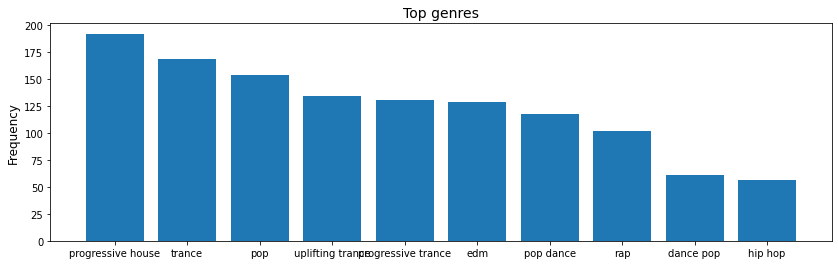

In [19]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (14,4))
ax.bar(to_1D(track_df['artist_genres']).value_counts().index[:10],
        to_1D(track_df['artist_genres']).value_counts().values[:10])
ax.set_ylabel("Frequency", size = 12)
ax.set_title("Top genres", size = 14)

### Top 20 Artists(by followers) for each of top 10 genres

In [20]:
top_10_genres = list(to_1D(track_df['artist_genres']).value_counts().index[:20])
top_artists_by_genre = []
for genre in top_10_genres:
  for index, row in by_art_fol.iterrows():
    if genre in row['artist_genres']:
      top_artists_by_genre.append({'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_artists_by_genre)

,artist_name,artist_genre
0,Armin van Buuren,progressive house
1,Tiësto,trance
2,Ed Sheeran,pop
3,Above & Beyond,uplifting trance
4,Above & Beyond,progressive trance
5,Marshmello,edm
6,Marshmello,pop dance
7,Drake,rap
8,Bruno Mars,dance pop
9,Drake,hip hop


### Top 20 Songs(by track_popularity) for each of top 10 genres

In [21]:
by_track_pop = pd.DataFrame(track_df.sort_values(by=['track_popularity'], ascending=False)[['track_popularity','track_name', 'artist_name','artist_genres', 'track_id']])
by_track_pop.astype(str).drop_duplicates().head(20)
top_songs_by_genre = []
for genre in top_10_genres:
  for index, row in by_track_pop.iterrows():
    if genre in row['artist_genres']:
      top_songs_by_genre.append({'track_name':row['track_name'], 'track_popularity':row['track_popularity'],'artist_name':row['artist_name'], 'artist_genre':genre})
      break
pd.json_normalize(top_songs_by_genre)

,track_name,track_popularity,artist_name,artist_genre
0,Rapture (Mixed),37,Kryder,progressive house
1,The Motto,89,Tiësto,trance
2,good 4 u,90,Olivia Rodrigo,pop
3,Feel It (Mixed),37,Cosmic Gate,uplifting trance
4,Feel It (Mixed),37,Cosmic Gate,progressive trance
5,Where Are You Now,90,Lost Frequencies,edm
6,Where Are You Now,90,Lost Frequencies,pop dance
7,One Right Now (with The Weeknd),85,Post Malone,rap
8,Woman,90,Doja Cat,dance pop
9,Knife Talk (with 21 Savage ft. Project Pat),83,Drake,hip hop


### Tracks' features analysis

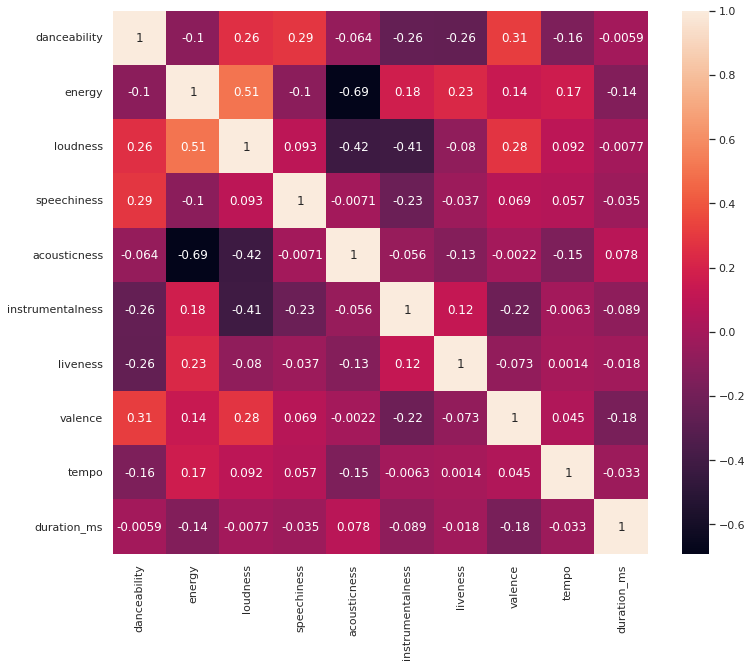

In [22]:
import seaborn as sn
sn.set(rc = {'figure.figsize':(12,10)})
sn.heatmap(tf_df.corr(), annot=True)
plt.show()

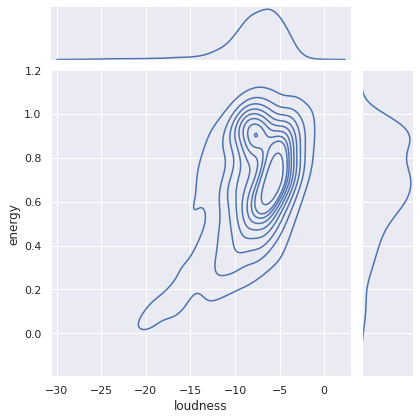

In [23]:
sn.set(rc = {'figure.figsize':(20,20)})
sn.jointplot(data=tf_df, x="loudness", y="energy", kind="kde")

### Feature portrait of the most popular songs

In [24]:
# TODO create a dataframe with features of top 100 songs
feat_cols = ['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence']
top_100_feat = pd.DataFrame(columns=feat_cols)
for i, track in by_track_pop[:100].iterrows():
  features = tf_df[tf_df['id'] == track['track_id']]
  top_100_feat = top_100_feat.append(features, ignore_index=True)
top_100_feat = top_100_feat[feat_cols]

In [25]:
from sklearn import preprocessing
mean_vals = pd.DataFrame(columns=feat_cols)
mean_vals = mean_vals.append(top_100_feat.mean(), ignore_index=True)
mean_vals = mean_vals.append(tf_df[feat_cols].mean(), ignore_index=True)
mean_vals

,danceability,energy,speechiness,acousticness,instrumentalness,liveness,valence
0,0.67873,0.652210,0.098927,0.225667,0.008147,0.165841,0.521835
1,0.60157,0.683548,0.096087,0.196778,0.207658,0.222600,0.466988


In [26]:
import plotly.graph_objects as go
import plotly.offline as pyo
fig = go.Figure(
    data=[
        go.Scatterpolar(r=mean_vals.iloc[0], theta=feat_cols, fill='toself', name='Top 100'),
        go.Scatterpolar(r=mean_vals.iloc[1], theta=feat_cols, fill='toself', name='All'),
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Feature comparison'),
        polar={'radialaxis': {'visible': True}},
        showlegend=True
    )
)

#pyo.plot(fig)
fig.show()

### Get track recommendations

In [27]:
rec = sp.recommendations(seed_artists=["3PhoLpVuITZKcymswpck5b"], seed_genres=["pop"], seed_tracks=["1r9xUipOqoNwggBpENDsvJ"], limit=100)
for track in rec['tracks']:
  print(track['artists'][0]['name'], track['name'])

The Neighbourhood Unfair
grandson Oh No!!! (from The Suicide Squad)
TOTO I'll Be Over You
Maroon 5 Payphone
Ava Max Take You To Hell
Little Mix Secret Love Song (feat. Jason Derulo)
Lionel Richie Stuck On You
John Lennon Jealous Guy - Remastered 2010
Marshmello Silence
Kiiara Whippin (feat. Felix Snow)
Wiz Khalifa Pull Up (feat. Lil Uzi Vert)
Fleetwood Mac Seven Wonders - 2017 Remaster
DeJ Loaf No Fear
NF CLOUDS
Lionel Richie All Night Long (All Night)
Jay Rock King's Dead (with Kendrick Lamar, Future & James Blake)
The Score Fighter
Sean Paul No Lie
Eminem Venom - Music From The Motion Picture
Elton John I Guess That's Why They Call It The Blues
Vicetone Angels (feat. Kat Nestel) - Radio Edit
Hailee Steinfeld Let Me Go (with Alesso, Florida Georgia Line & watt)
Shawn Mendes I Know What You Did Last Summer
Eagles I Can't Tell You Why - 2013 Remaster
Charli XCX 1999
Avicii Hey Brother
YUNGBLUD fleabag
Set It Off Wolf in Sheep's Clothing
A Boogie Wit da Hoodie Drowning (feat. Kodak Black